In [20]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import numpy as np

In [5]:
data = pd.read_excel('JUIndoorLoc-Training-AllData-zheng.xlsx')

In [8]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(data.iloc[:, 3:], data.iloc[:, 0:3])
# 将模型保存到本地
joblib.dump(model, 'model.pkl')


['model.pkl']

In [99999]:
test_data = pd.read_excel('JUIndoor-Test-AllData-zheng.xlsx')
test = test_data.iloc[:, 3:]
predictions = model.predict(test)
print(predictions)

[[ 4.02 33.32 13.62]
 [ 4.02 33.38 13.13]
 [ 4.   33.08 13.01]
 ...
 [ 4.59 36.26 11.72]
 [ 4.72 36.62 12.01]
 [ 4.68 35.98 10.86]]


Text(0, 0.5, 'Error (m)')

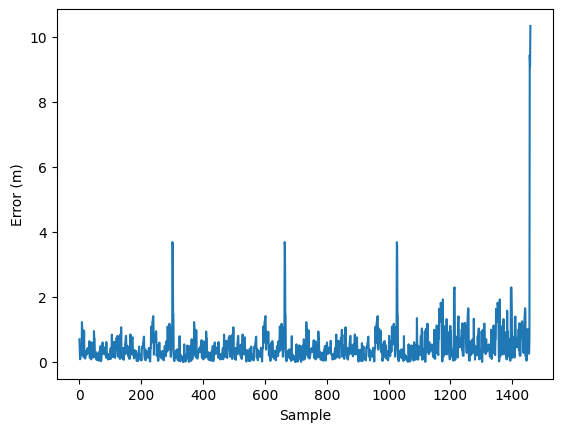

In [26]:
locaton = test_data.iloc[:, 0:3].to_numpy()
error = np.zeros(len(predictions))
for i in range(len(predictions)):
    error[i] = np.sqrt((predictions[i, 1] - locaton[i, 1])**2 + (predictions[i, 2] - locaton[i, 2])**2)
    # error[i] = abs(predictions[i, 1] - locaton[i, 1]) + abs(predictions[i, 2] - locaton[i, 2])
plt.plot(error)
plt.xlabel('Sample')
plt.ylabel('Error (m)')